# NipalsPLS Model Training and Regression Vector Visualization

This notebook demonstrates training a NipalsPLS model on the standard PLS testing data and visualizing the resulting regression coefficients.

## 1. Import Required Libraries

In [ ]:
import warnings
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from open_nipals.nipalsPLS import NipalsPLS

warnings.filterwarnings("ignore")

plt.rcParams["font.size"] = 12

saveflag = True

## 2. Load PLS Testing Data

In [ ]:
# Define path to data directory
work_dir = Path.cwd()
data_path = work_dir.joinpath("..", "..", "data")

# Load X and Y data
x_data = pd.read_csv(data_path.joinpath("XData.csv")).iloc[:, 1:].to_numpy()
y_data = (
    pd.read_csv(data_path.joinpath("YData.csv"))
    .iloc[:, [1]]
    .to_numpy()
    .reshape(-1, 1)
)
x_data.shape, y_data.shape

((1000, 5000), (1000, 1))

## 3. Initialize and Train NipalsPLS Model

In [ ]:
# Standardize the data using mean-centering and scaling
scaler_x = StandardScaler()
x_scaled = scaler_x.fit_transform(x_data)

scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y_data)


In [ ]:
# Initialize and train the NipalsPLS model
pls_model = NipalsPLS()
pls_model.fit(X=x_scaled, y=y_scaled)

NipalsPLS()

In [ ]:
# Make predictions on the training data
y_pred_scaled = pls_model.predict(x_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

# Calculate prediction error metrics
rmse = np.sqrt(np.mean((y_data - y_pred) ** 2))
r2 = 1 - np.sum((y_data - y_pred) ** 2) / np.sum((y_data - y_data.mean()) ** 2)

print(f"Model Performance:")
print(f"  RMSE: {rmse:.6f}")
print(f"  R² Score: {r2:.6f}")

Model Performance:
  RMSE: 0.020523
  R² Score: 0.999999


## 4. Extract and Visualize Regression Vector

In [ ]:
# Extract the regression coefficients (regression vector)
regression_vector = pls_model.get_reg_vector().reshape(-1)
regression_vector

array([0., 0., 0., ..., 0., 0., 0.], shape=(5000,))

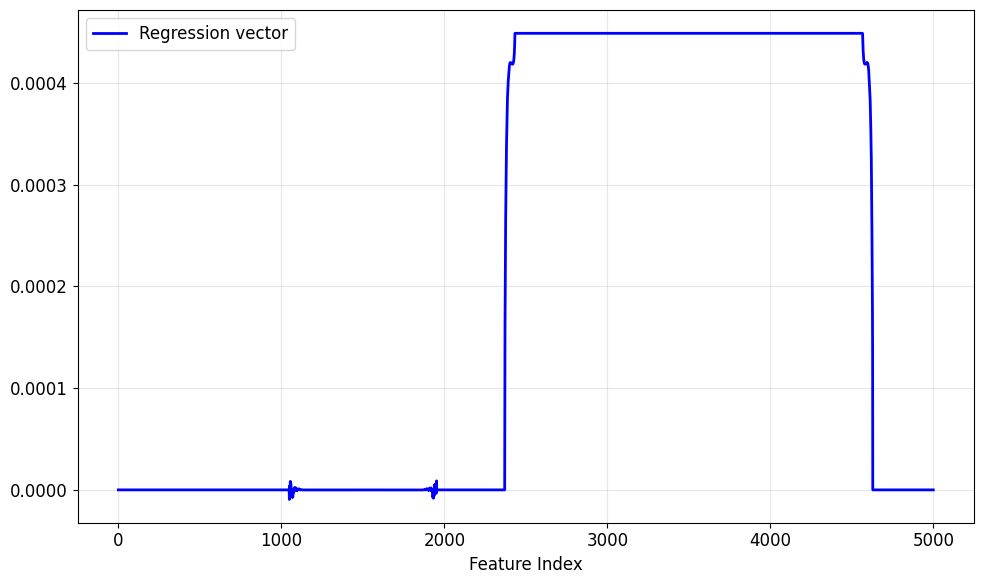

In [ ]:
# Create a visualization of the regression vector
fig, ax = plt.subplots(figsize=(10, 6))

# Line plot of regression coefficients
feature_indices = np.arange(len(regression_vector))
ax.plot(
    feature_indices,
    regression_vector,
    linewidth=2,
    color="blue",
    markersize=6,
    label="Regression vector",
)
ax.set_xlabel("Feature Index")
ax.grid(alpha=0.3)

plt.tight_layout()
plt.legend()
if saveflag:
    plt.savefig(
        work_dir.joinpath("..", "plots", "regression_vector_plot.png"),
        bbox_inches="tight",
        dpi=600,
    )
plt.show()